In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv(r"C:\Users\jam\Desktop\ML\ecommerce_customer_behavior_dataset.csv")
df.sample(3)

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
2413,ORD_000694,CUST_00694,2023-08-09,42,Male,Ankara,Toys,161.82,1,0.0,161.82,Debit Card,Desktop,6,9,True,8,3
123,ORD_001995,CUST_01995,2023-01-15,39,Female,Istanbul,Food,33.52,2,0.0,67.04,Cash on Delivery,Mobile,22,10,False,4,2
3810,ORD_003500,CUST_03500,2023-12-11,30,Male,Izmir,Food,23.25,1,0.0,23.25,Bank Transfer,Desktop,4,6,False,12,3


In [68]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [69]:
df = df.drop(columns=["Order_ID", 'Customer_ID'])

In [70]:
df.shape

(5000, 16)

In [71]:
df = df.dropna()

In [72]:
from sklearn.preprocessing import LabelEncoder

In [73]:
def encode(feature):
    l = LabelEncoder()
    df[feature] = l.fit_transform(df[feature])
    print(df[feature].value_counts)

In [74]:
encode("City")

<bound method IndexOpsMixin.value_counts of 0       3
1       9
2       1
3       6
4       6
       ..
4995    7
4996    0
4997    2
4998    6
4999    9
Name: City, Length: 5000, dtype: int64>


In [75]:
encode("Gender")

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       0
3       1
4       0
       ..
4995    0
4996    1
4997    0
4998    0
4999    0
Name: Gender, Length: 5000, dtype: int64>


In [76]:
encode('Product_Category')

<bound method IndexOpsMixin.value_counts of 0       7
1       7
2       4
3       2
4       6
       ..
4995    0
4996    0
4997    4
4998    3
4999    1
Name: Product_Category, Length: 5000, dtype: int64>


In [77]:
encode('Device_Type')

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       1
4       0
       ..
4995    1
4996    1
4997    1
4998    1
4999    0
Name: Device_Type, Length: 5000, dtype: int64>


In [78]:
encode('Is_Returning_Customer')

<bound method IndexOpsMixin.value_counts of 0       1
1       1
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: Is_Returning_Customer, Length: 5000, dtype: int64>


In [79]:
encode("Payment_Method")

<bound method IndexOpsMixin.value_counts of 0       3
1       2
2       2
3       2
4       1
       ..
4995    0
4996    3
4997    4
4998    2
4999    3
Name: Payment_Method, Length: 5000, dtype: int64>


In [80]:
df["Date"]= pd.to_datetime(df["Date"],format='%Y-%m-%d')
df["Month"] = df["Date"].dt.month
df["Weekend"] = (df["Date"].dt.dayofweek).isin([5,6]).astype(int)

In [81]:
df = df.drop(columns=['Date'])

In [82]:
df.shape

(5000, 17)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       5000 non-null   int64  
 1   Gender                    5000 non-null   int64  
 2   City                      5000 non-null   int64  
 3   Product_Category          5000 non-null   int64  
 4   Unit_Price                5000 non-null   float64
 5   Quantity                  5000 non-null   int64  
 6   Discount_Amount           5000 non-null   float64
 7   Total_Amount              5000 non-null   float64
 8   Payment_Method            5000 non-null   int64  
 9   Device_Type               5000 non-null   int64  
 10  Session_Duration_Minutes  5000 non-null   int64  
 11  Pages_Viewed              5000 non-null   int64  
 12  Is_Returning_Customer     5000 non-null   int64  
 13  Delivery_Time_Days        5000 non-null   int64  
 14  Customer

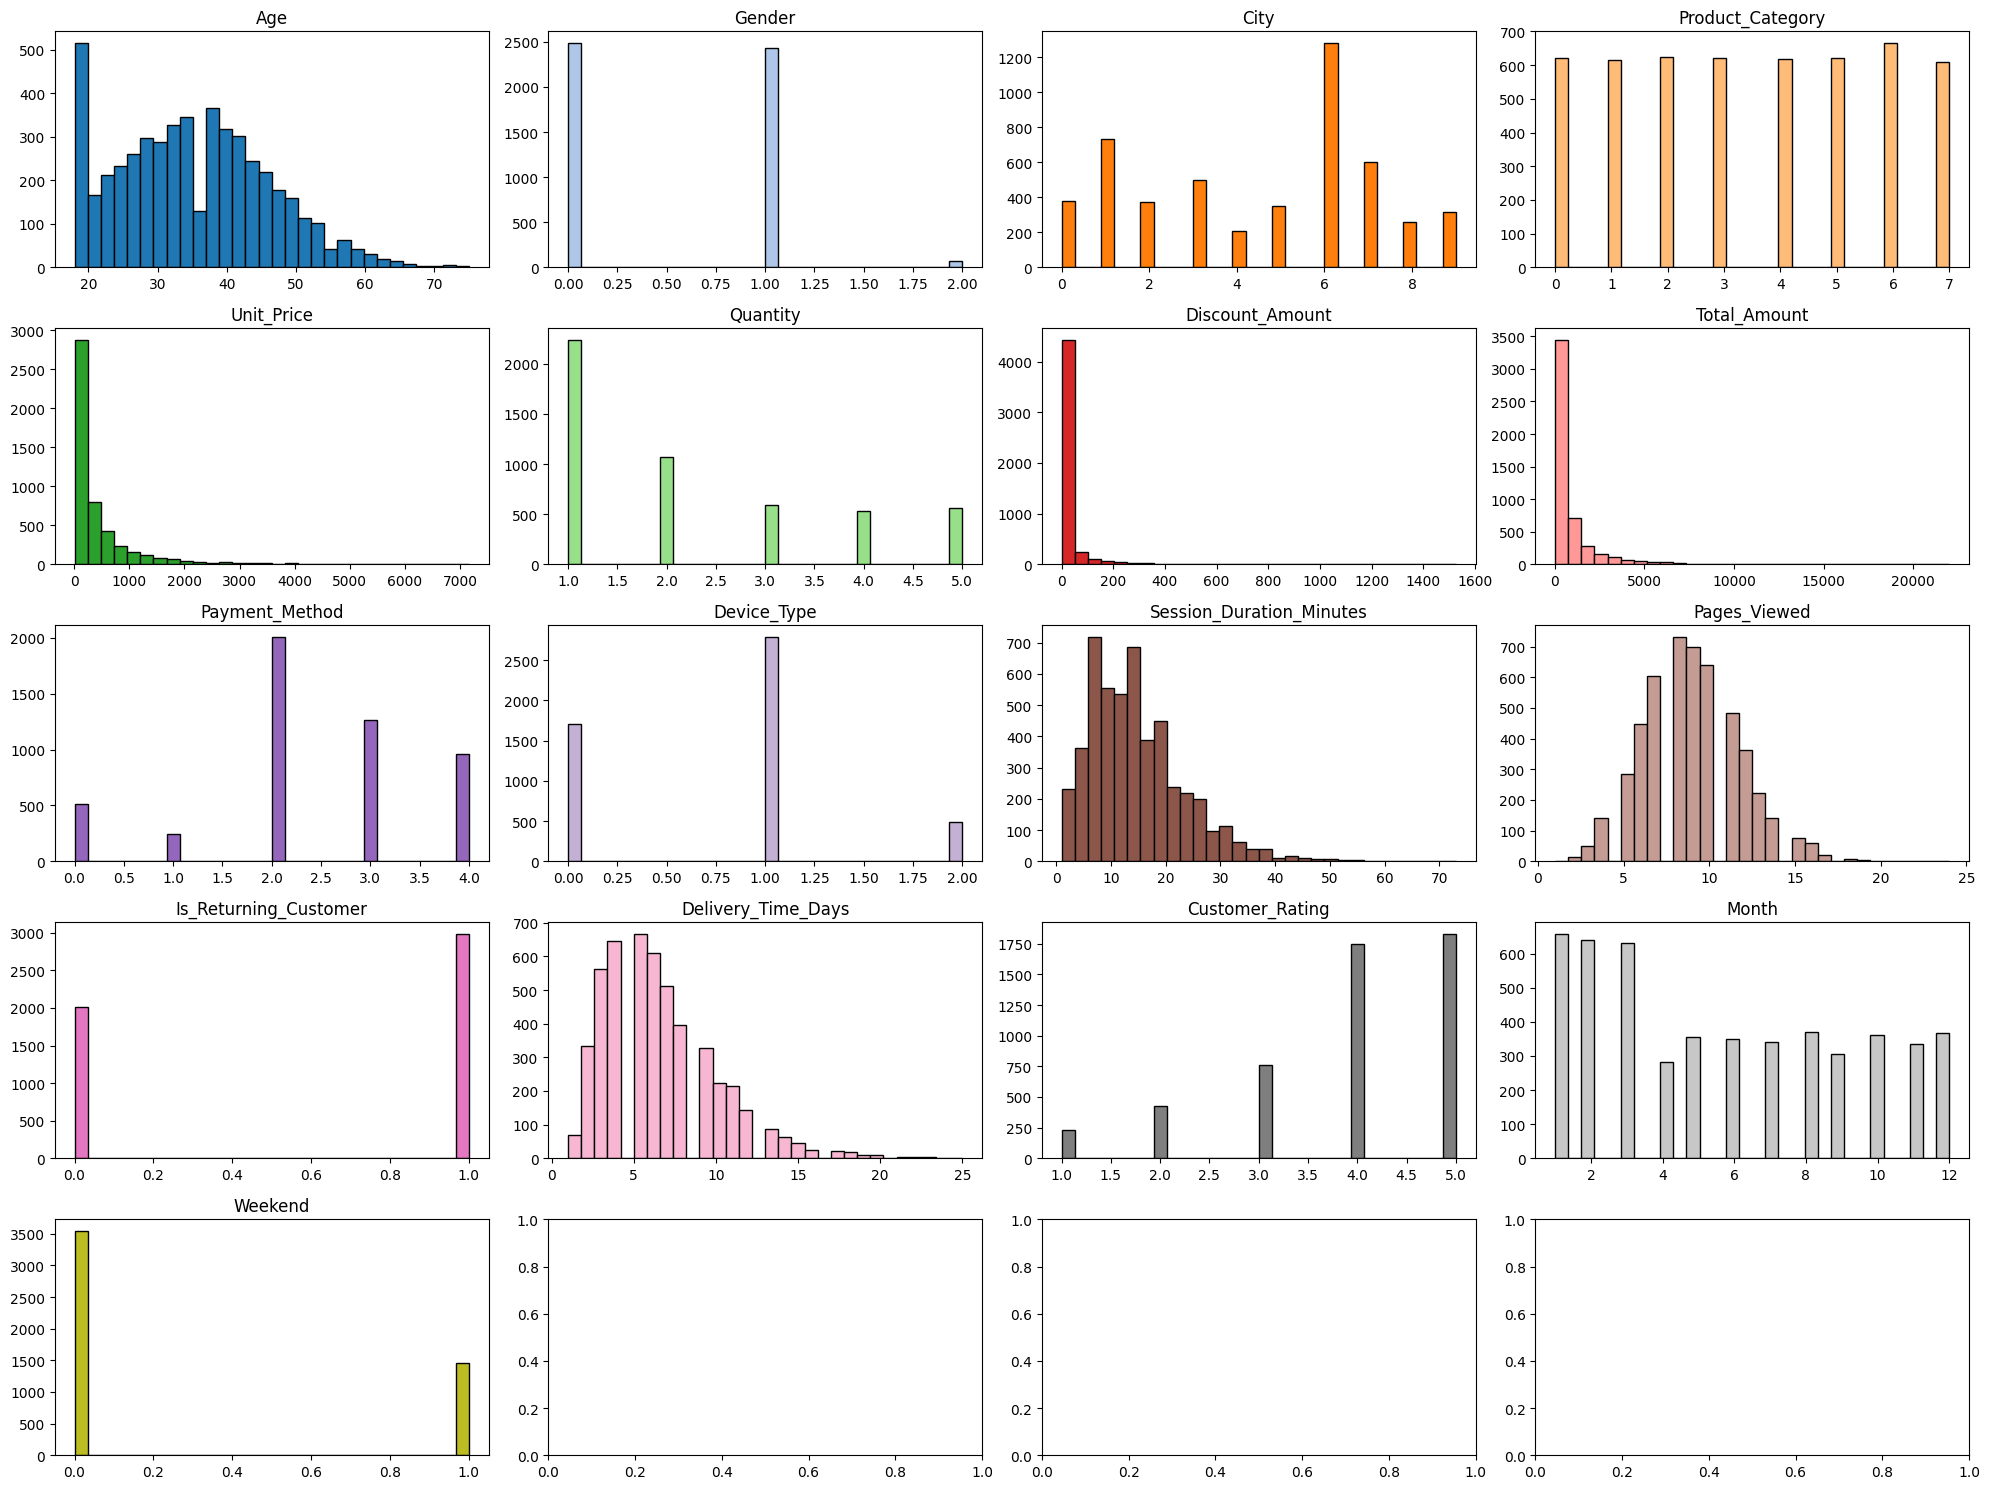

In [84]:
col = df.columns
colors = plt.cm.tab20.colors

fig,axs = plt.subplots(nrows=5,ncols=4,figsize=(20,15))
axs=axs.flatten()
for i, col in enumerate(col):
    axs[i].hist(df[col], bins=30, color=colors[i % len(colors)], edgecolor='black')
    axs[i].set_title(col)
    
plt.tight_layout()
plt.show()

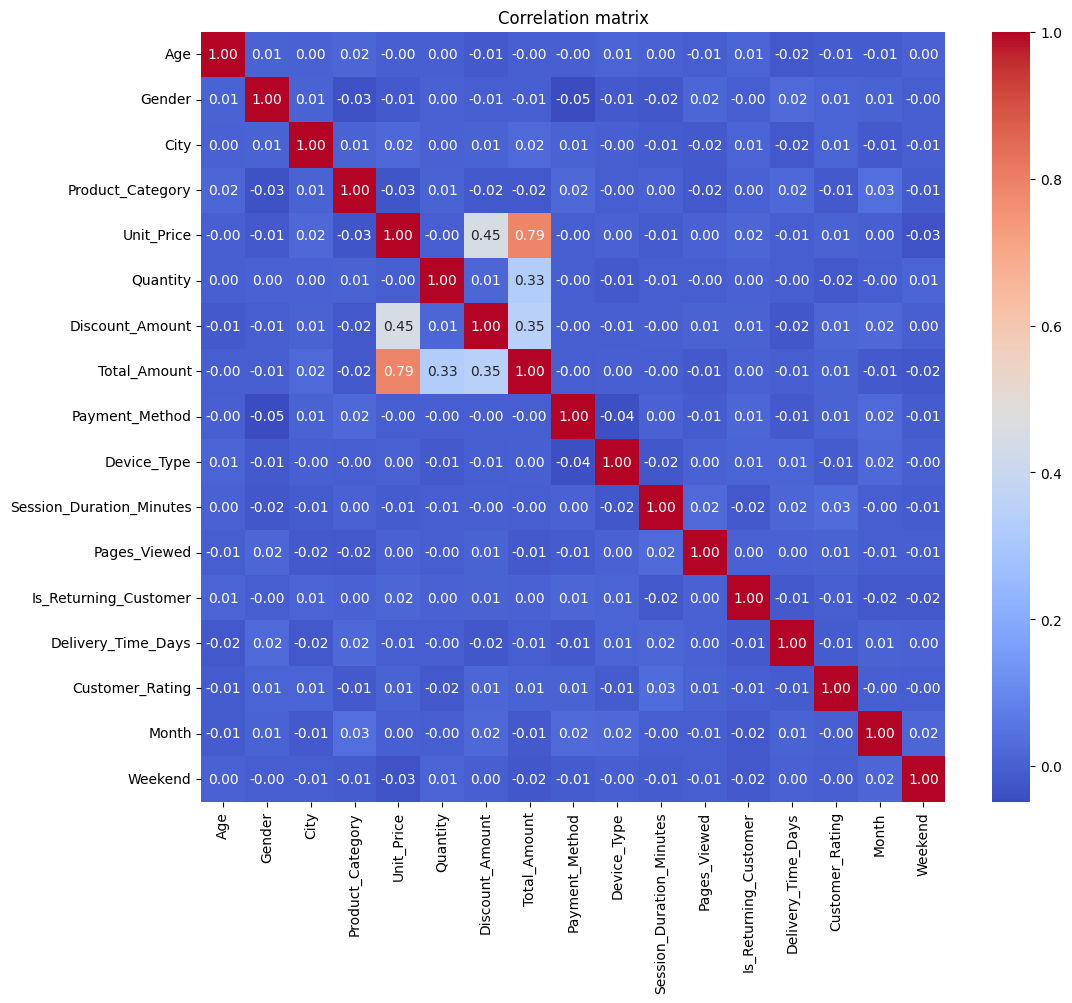

In [85]:
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()


In [86]:
df.columns

Index(['Age', 'Gender', 'City', 'Product_Category', 'Unit_Price', 'Quantity',
       'Discount_Amount', 'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating', 'Month', 'Weekend'],
      dtype='object')

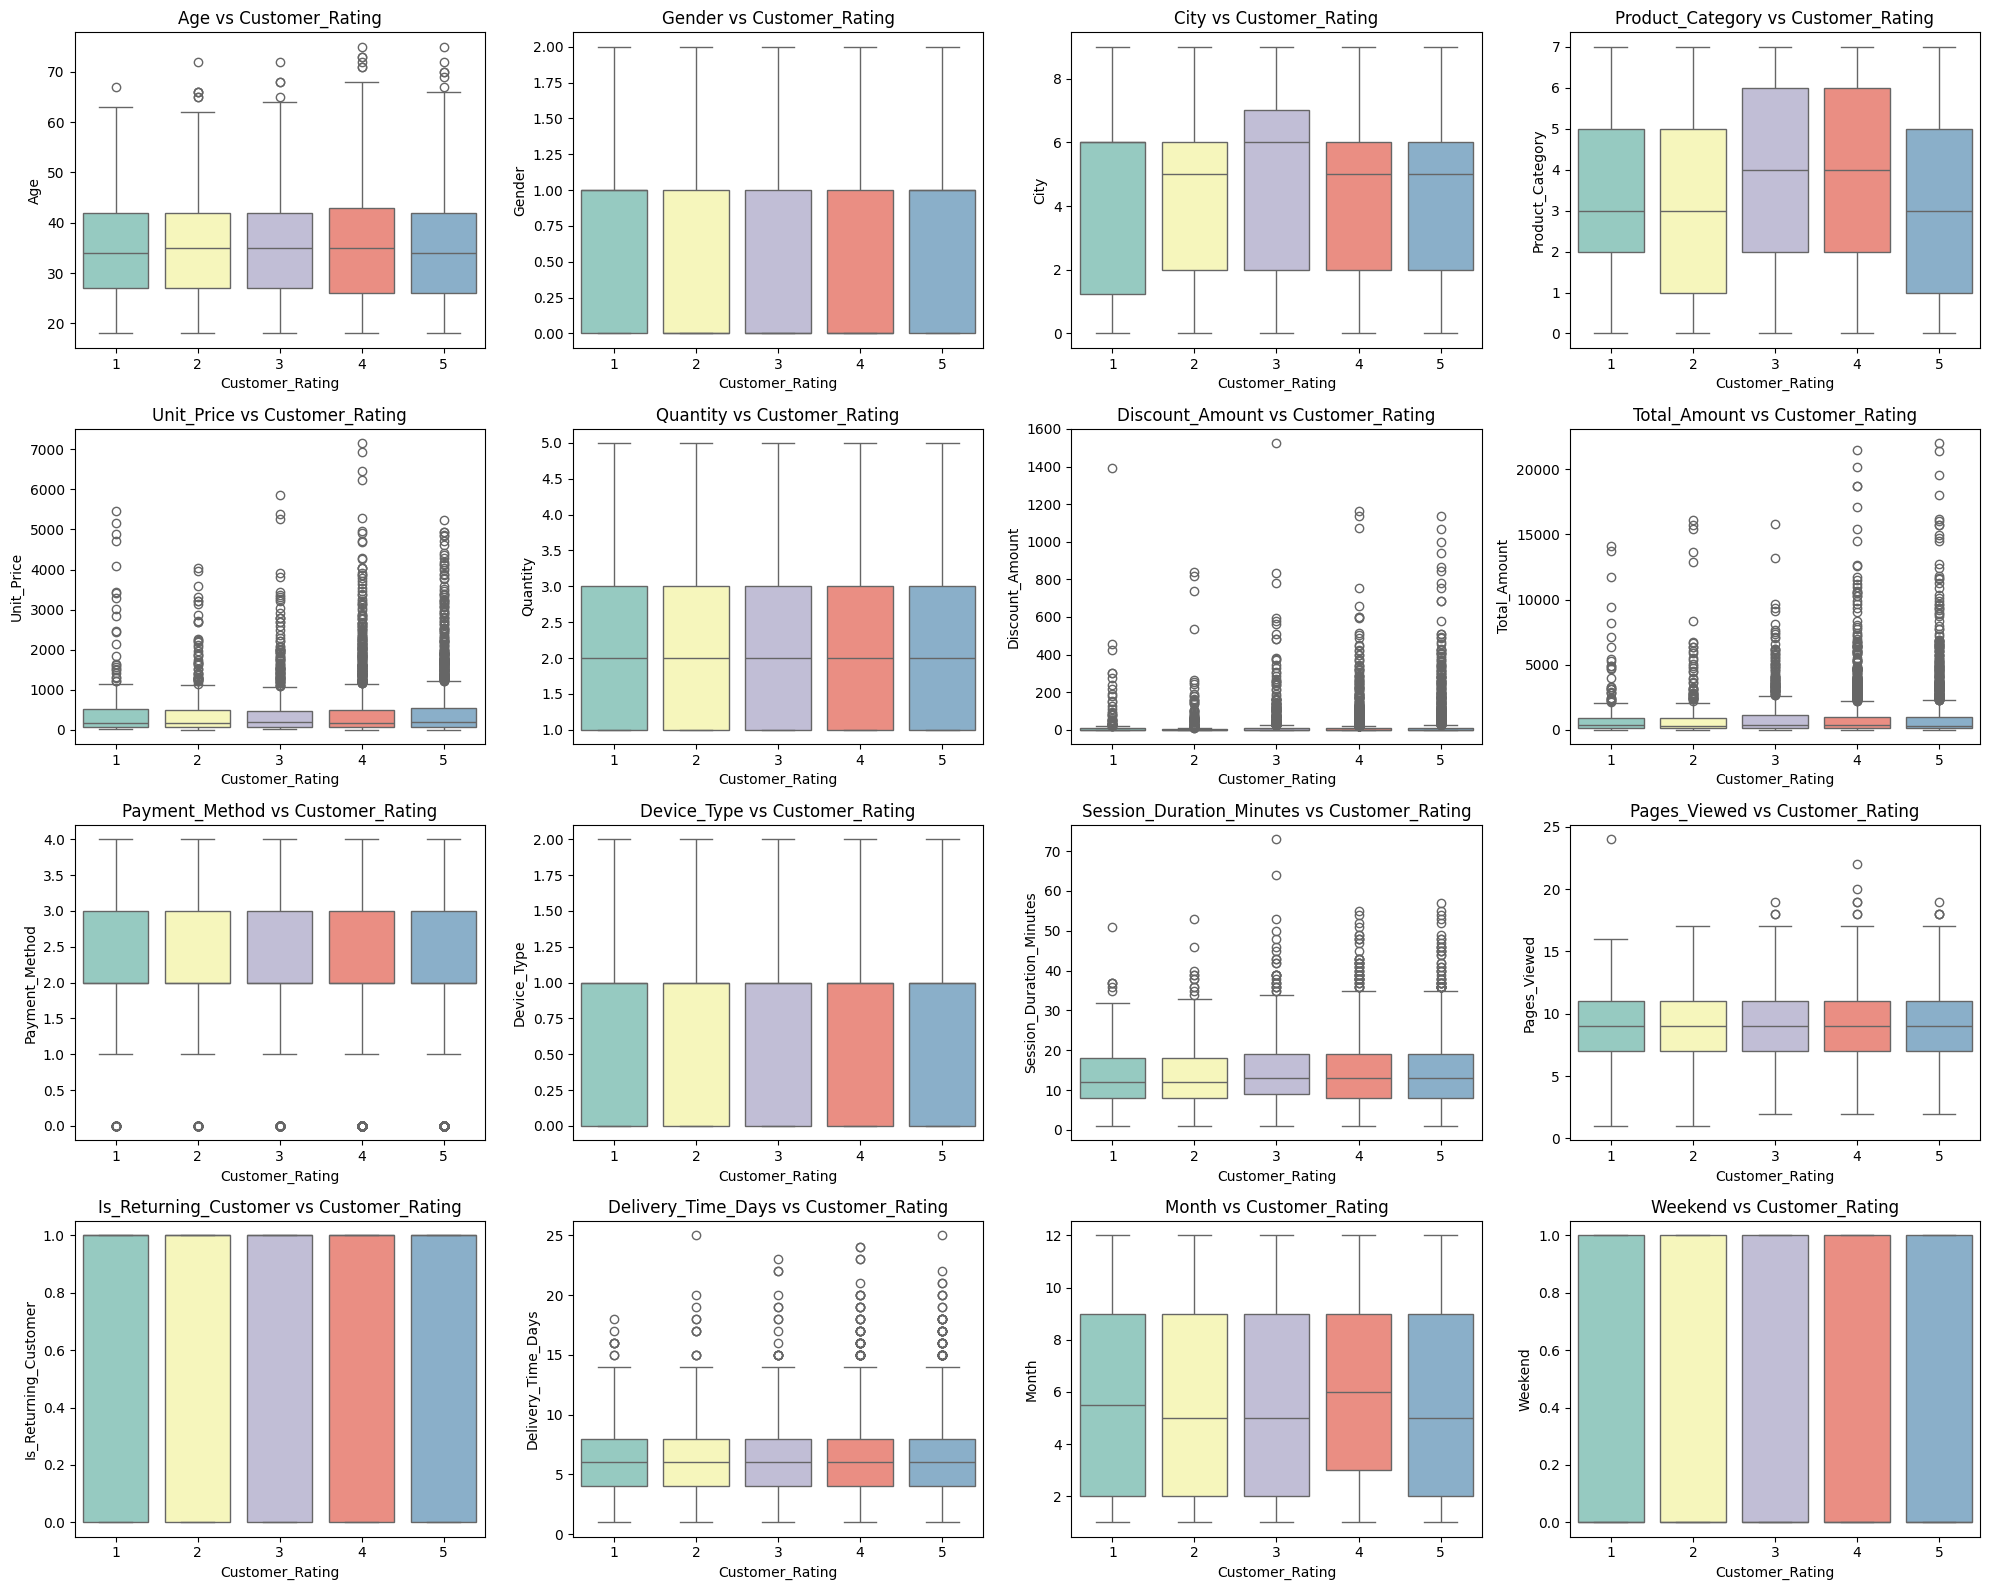

In [87]:
import math

target = 'Customer_Rating'
numeric_cols = [col for col in df.columns if col != target]

n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows*4))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(
        x=target,
        y=col,
        hue=target,        
        data=df,
        ax=axes[i],
        palette='Set3',
        dodge=False,       
        legend=False       
    )
    axes[i].set_title(f'{col} vs {target}')


plt.tight_layout()
plt.show()

In [88]:
target =[]
for i in df.columns :
    if i =='Customer_Rating':
        target.append(i) 
df.columns = df.columns.str.strip() 
df.columns

Index(['Age', 'Gender', 'City', 'Product_Category', 'Unit_Price', 'Quantity',
       'Discount_Amount', 'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating', 'Month', 'Weekend'],
      dtype='object')

In [89]:
x = df.drop(target , axis=1)
y = df[target].values.ravel()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler

In [102]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size= 0.3 , random_state=4)
print(x.shape)
print(y.shape)

(5000, 16)
(5000,)


In [104]:
s = StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)
x_train[5,:]

array([-0.79693234, -0.97486676, -1.64967621,  1.07259466,  1.33238716,
        1.98877817,  2.72240567,  3.01247087,  0.53788955, -1.22023819,
       -1.12562296, -0.36234189,  0.81990292,  1.02456701, -1.01818059,
       -0.63998842])